In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'batang'

In [5]:
data = pd.read_csv('따릉이데이터(반납량추가)/강남구 데이터.csv')

In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data['이용량'] = data['반납량'] - data['대여량']
data.drop(['대여량','반납량'], axis=1, inplace=True)
data

,년,월,일,시,요일,휴일,기온,습도,강수량,풍속,미세먼지,초미세먼지,오존,확진자수,대여소번호,이용량
0,2018,1,1,2,0,1,-1.0,35,0.0,1.1,2,2,1,0,2340,0
1,2018,1,1,9,0,1,-2.0,58,0.0,0.2,2,2,1,0,2315,0
2,2018,1,1,9,0,1,-2.0,58,0.0,0.2,2,2,1,0,2355,0
3,2018,1,1,11,0,1,1.1,30,0.0,1.1,2,2,1,0,2372,1
4,2018,1,1,11,0,1,1.1,30,0.0,1.1,2,2,1,0,2337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654065,2021,6,30,22,2,0,24.9,77,0.0,1.0,2,2,1,194,2335,0
654066,2021,6,30,22,2,0,24.9,77,0.0,1.0,2,2,1,194,2408,4
654067,2021,6,30,22,2,0,24.9,77,0.0,1.0,2,2,1,194,2419,0
654068,2021,6,30,22,2,0,24.9,77,0.0,1.0,2,2,1,194,2389,1


In [10]:
dayofweek = ["요일_"+str(i) for i in range(7)]
features = ['월','일','시','휴일','기온','강수량','습도','풍속','미세먼지','초미세먼지','오존','확진자수'] + dayofweek
features

['월',
 '일',
 '시',
 '휴일',
 '기온',
 '강수량',
 '습도',
 '풍속',
 '미세먼지',
 '초미세먼지',
 '오존',
 '확진자수',
 '요일_0',
 '요일_1',
 '요일_2',
 '요일_3',
 '요일_4',
 '요일_5',
 '요일_6']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import TimeSeriesSplit

n = 3
cols = ['월','일','시','휴일','기온','강수량','습도','풍속','미세먼지','초미세먼지','오존','확진자수', '요일']
#results = {}
total = data['대여소번호'].nunique()

for idx, (name, _data) in enumerate(data.groupby('대여소번호'), 1):
    print("[%d/%d] %s" %(idx, total, name), end=' ')
    
    try:
        _data = _data.groupby(cols)['이용량'].sum().reset_index()
        _data = _data.join(pd.get_dummies(_data['요일'], prefix="요일"))

        print(_data.shape)

        X_train, X_test, y_train, y_test = train_test_split(_data[features], _data['이용량'], test_size=0.2, random_state=150)        
        
        param_grid = {
            "learning_rate" : [0.025, 0.027, 0.029],
            "gamma": uniform(0.4, 0.8).rvs(n),
            "n_estimators": randint(50, 200).rvs(n), # default 100
        }
    
        grid = GridSearchCV(xgb.XGBRegressor(), cv=5, n_jobs=-1, param_grid=param_grid)
        grid = grid.fit(X_train, y_train)
        model = grid.best_estimator_
    
        print(" : complete.")
        model.save_model('강남구_{}.model'.format(name))
        
    except:
        continue

[1/118] 2301 (14400, 21)
 : complete.
[2/118] 2302 (13289, 21)
 : complete.
[3/118] 2303 (10197, 21)
 : complete.
[4/118] 2304 (1947, 21)
 : complete.
[5/118] 2305 (3503, 21)
 : complete.
[6/118] 2306 (11240, 21)
 : complete.
[7/118] 2307 (10254, 21)
 : complete.
[8/118] 2308 (8834, 21)
 : complete.
[9/118] 2309 (3487, 21)
 : complete.
[10/118] 2310 (6336, 21)
 : complete.
[11/118] 2311 (1883, 21)
 : complete.
[12/118] 2312 (4812, 21)
 : complete.
[13/118] 2313 (10367, 21)
 : complete.
[14/118] 2314 (7484, 21)
 : complete.
[15/118] 2315 (11147, 21)
 : complete.
[16/118] 2316 (10351, 21)
 : complete.
[17/118] 2317 (8192, 21)
 : complete.
[18/118] 2318 (6181, 21)
 : complete.
[19/118] 2319 (5889, 21)
 : complete.
[20/118] 2320 (8661, 21)
 : complete.
[21/118] 2321 (8515, 21)
 : complete.
[22/118] 2322 (8020, 21)
 : complete.
[23/118] 2323 (3473, 21)
 : complete.
[24/118] 2324 (10451, 21)
 : complete.
[25/118] 2325 (10660, 21)
 : complete.
[26/118] 2326 (3948, 21)
 : complete.
[27/118] 23

In [ ]:
# 전체 평균 MAE
errors = np.array([result['mae'] for result in results.values()])
errors.mean()

In [7]:
# 최적 파라미터
best_param

{'gamma': 0.6236833267721744, 'learning_rate': 0.028, 'n_estimators': 152}

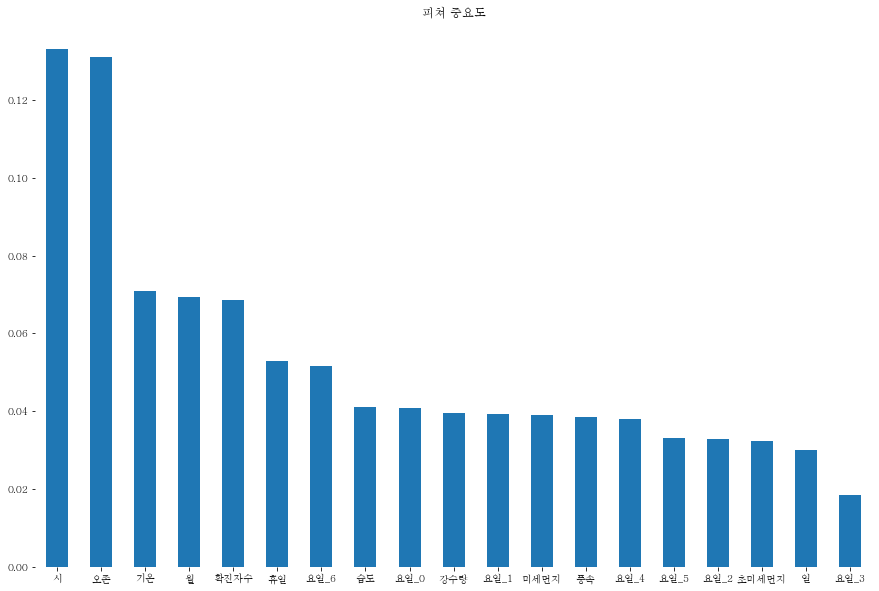

In [8]:
# Feature 중요도 
feature_importance = pd.Series(index=features, data=model.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(15, 10), title="피쳐 중요도", rot=0)
plt.box(False)
plt.show()

AttributeError: 'list' object has no attribute 'head'

In [9]:
# 파일명
filename = '강남구.model'

# 모델 저장
model.save_model(filename)